In [1]:
#snippet to set notebook to screen width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

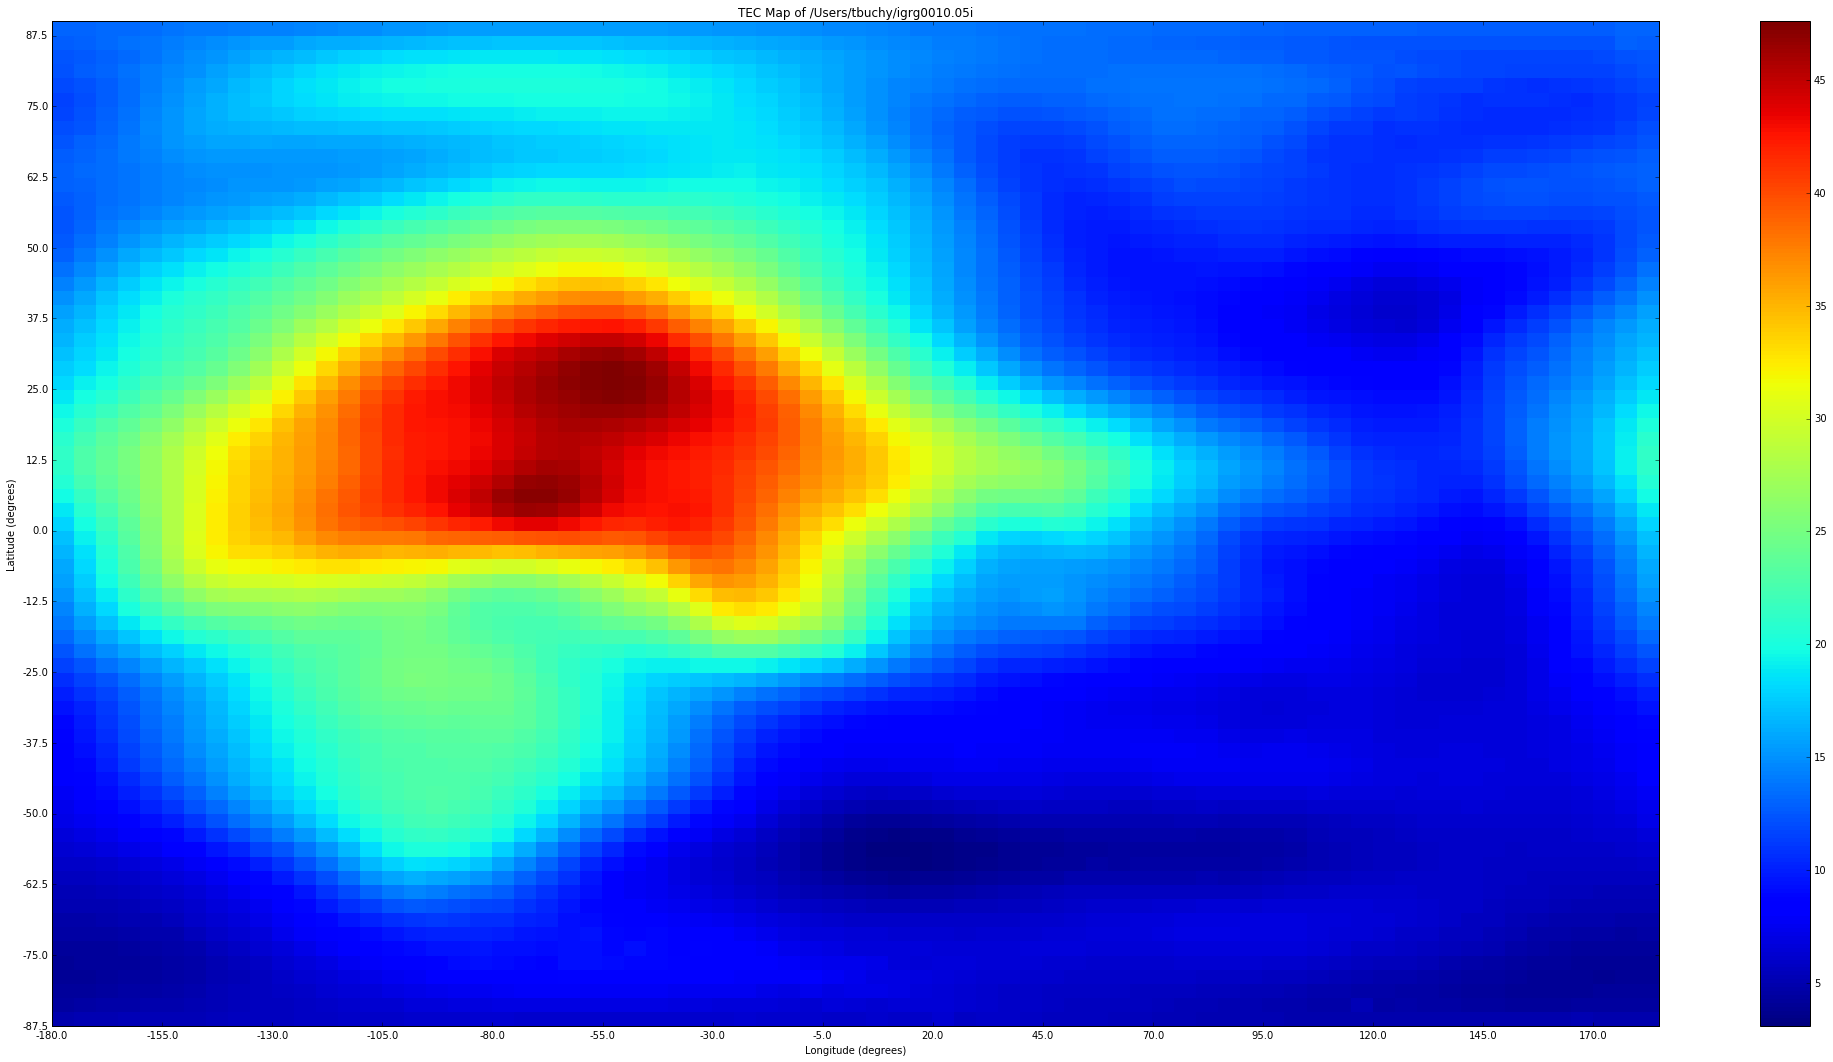

In [7]:
from tec_map_generator import generate_tec_map
%matplotlib inline
PATH_TO_IONEX = '/Users/tbuchy/igrg0010.05i'
# Play with tecs here if you need!
tecs = generate_tec_map(PATH_TO_IONEX, hour_in_day=19)